In [38]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split
from BaselineRemoval import BaselineRemoval
from sklearn.preprocessing import MinMaxScaler, StandardScaler


import sys
from sklearn.preprocessing import MinMaxScaler, StandardScaler



## 1. ETL

In [39]:
from src import spectrumloader as spl

In [40]:
PLT = 'dataset/' ## change to the path to dataset
standard,data_all = spl.read_file(PLT)

In [41]:
Xs,ys,_ = spl.cut_tonumpy(data_all)

In [42]:
assert len(Xs) == 4, 'DATA error'

## 2.Train test split (with same seed)

In [43]:
X_trainall,_,y_trainall,_ = spl.split_train_test(Xs,ys)
y_train0,y_train1,y_train2,y_train3 = y_trainall

## 3. EDA [here](https://github.com/AtiChetsurakul/DataScienceAndMLProjects/blob/main/Diabete_detection_withRamanSpec/datawatcher.ipynb)
- To shorten the file, eda not inculded

## 4. spectrum tranformation 
- incuding
    - Fluoresence removal
    - Correcting baseline
    - Normalization

In [44]:
X_train_VR = spl.fluoresence_removal(X_trainall)

In [45]:
X_train0_std,X_train1_std,X_train2_std,X_train3_std,normalizer = spl.seting_normalized_fuoresence_smoothing(True,True,X_train_VR)

assert len(normalizer) == 4, 'Normalizer is not here'

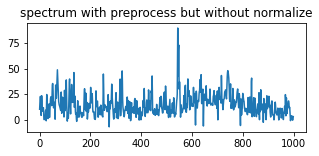

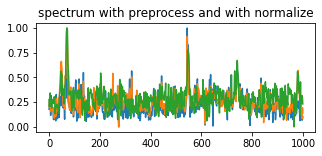

In [46]:
# Check by plot
plt.figure(figsize=(5,2))
plt.plot(X_train_VR[0][0])
plt.title('spectrum with preprocess but without normalize')
plt.show()
plt.figure(figsize=(5,2))
plt.title('spectrum with preprocess and with normalize')
plt.plot(X_train0_std[0])
plt.plot(X_train0_std[7])
plt.plot(X_train0_std[-1])

plt.show()

In [47]:
from sklearn import svm


clf = svm.SVC(kernel='linear') # Linear Kernel
clf1=svm.SVC(kernel='linear')
clf2=svm.SVC(kernel='linear')
clf3=svm.SVC(kernel='linear')

In [48]:
from sklearn.model_selection import cross_val_score

clf = svm.SVC(kernel='linear') # Linear Kernel
clf1=svm.SVC(kernel='rbf')
clf2=svm.SVC(kernel='poly')
print('EAR lorp')

scoresclf = cross_val_score(clf, X_train0_std, y_train0, cv=5)
print(scoresclf)

scoresclf = cross_val_score(clf1, X_train0_std, y_train0, cv=5)
print(scoresclf)

scoresclf = cross_val_score(clf2, X_train0_std, y_train0, cv=5)
print(scoresclf)


EAR lorp
[0.75       0.66666667 0.66666667 0.66666667 0.66666667]
[0.5        0.         0.33333333 0.66666667 0.66666667]
[0.5        0.66666667 0.66666667 0.66666667 0.66666667]


In [49]:
print('Inner Arm')

clf = svm.SVC(kernel='linear') # Linear Kernel
clf1=svm.SVC(kernel='rbf')
clf2=svm.SVC(kernel='poly')

scoresclf1 = cross_val_score(clf, X_train1_std, y_train1, cv=5)
print(scoresclf1)


scoresclf1 = cross_val_score(clf1, X_train1_std, y_train1, cv=5)
print(scoresclf1)


scoresclf1 = cross_val_score(clf2, X_train1_std, y_train1, cv=5)
print(scoresclf1)


Inner Arm
[0.75       0.33333333 1.         0.66666667 0.33333333]
[0.25       0.33333333 0.33333333 0.33333333 0.33333333]
[0.25       0.66666667 0.66666667 0.66666667 0.33333333]


In [50]:
print('thumbnail')

clf = svm.SVC(kernel='linear') # Linear Kernel
clf1=svm.SVC(kernel='rbf')
clf2=svm.SVC(kernel='poly')

scoresclf2= cross_val_score(clf, X_train2_std, y_train2, cv=5)
print(scoresclf2)


scoresclf2= cross_val_score(clf1, X_train2_std, y_train2, cv=5)
print(scoresclf2)

scoresclf2= cross_val_score(clf2, X_train2_std, y_train2, cv=5)
print(scoresclf2)




thumbnail
[0.5        0.66666667 0.66666667 0.66666667 1.        ]
[0.25       0.33333333 0.33333333 0.33333333 0.33333333]
[0.25       1.         1.         0.66666667 0.66666667]


In [51]:
print('Vain')

clf = svm.SVC(kernel='linear') # Linear Kernel
clf1=svm.SVC(kernel='rbf')
clf2=svm.SVC(kernel='poly')

scoresclf3=cross_val_score(clf, X_train3_std, y_train3, cv=5)
print(scoresclf3)


scoresclf3=cross_val_score(clf1, X_train3_std, y_train3, cv=5)
print(scoresclf3)


scoresclf3=cross_val_score(clf2, X_train3_std, y_train3, cv=5)
print(scoresclf3)

Vain
[0.5        0.33333333 1.         0.33333333 0.66666667]
[0.5        0.66666667 0.33333333 0.33333333 0.33333333]
[0.5        0.33333333 1.         0.33333333 0.33333333]


In [ ]:
clf = svm.SVC(kernel='linear')